<a href="https://www.kaggle.com/code/ameau01/uber-fare-prediction?scriptVersionId=237158064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CSCA-5622: Supervised Machine Learning - Final Project #


<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/Uber1.jpg" alt="." width="300">

## Uber Fare Prediction ##
### - Predict Uber Fares Using Machine Learning on Time Series Data ###
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5622-final-project/tree/main](https://github.com/alme9155/csca-5622-final-project/tree/main)  
---

## I. Project Description ##

This is the final project of CSCA-5622: Supervised Learning Algorithms in Machine Learning.

### Topic: **Predict Uber Fares Using Machine Learning on Time Series Data.** ###

### I.i. Objective: ####

This project aims to evaluate the performance of various machine learning algorithms, including Linear Regression, Random Forest, and Gradient Boosting, when applied to time series data. By adapting supervised learning methods on the Uber fare dataset, this experimental analysis lays the foundation for understanding autoregression, a time series technique to be explored in future projects.

### I.ii. Background ####

What is **time series** data?

**Time series data** is a sequence of data points collected over time, where each point is associated with a specific timestamp. The key characteristic is that the order of the data points matters, as they are recorded sequentially at particular intervals (e.g., hourly, daily, monthly). Common examples include stock prices, and weather measurements. Using regression on time series data often involves modeling how past events or patterns to predict future event occurrences.

### I.iii. Project Significance ###

This project aims to answer this question: 

**Can supervised learning methods be effectively used to predict future events based on historical data?** 

This study seeks to explore the challenges of adapting machine learning techniques to time-series data, evaluate the relative performance of various models, and analyze the underlying factors influencing their effectiveness

### I.iv. Machine Learning algorithm used in this project: ###

* Linear Regression
* Random Forest
* Gradient Boosting

### Dataset: ###

"Uber Fares Dataset" from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset).


## II. Dataset Description: ##

The Uber Fares Dataset from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset) contains over 200,000 records of uber trip data collected from Uber API. Each row in the Uber fares dataset captures details such as the fare amount, pickup and dropoff times, locations, and passenger count.

### Columns: ###

- **key** : a unique identifier for each trip
- **fare_amount** : the cost of each trip in usd
- **pickup_datetime** : date and time when the meter was engaged
- **passenger_count** : the number of passengers in the vehicle (driver entered value)
- **pickup_longitude** : the longitude where the meter was engaged
- **pickup_latitude** : the latitude where the meter was engaged
- **dropoff_longitude** : the longitude where the meter was disengaged
- **dropoff_latitude** : the latitude where the meter was disengaged


## III. Exploratory Data Analysis ##

### III.i.Loading the data from Kaggle ###
This notebook require internet connection to access dataset from the kaggle dataset.

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# loading the data
data = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')
data = data.drop("Unnamed: 0", axis=1)

print(f"Data loaded successfully.")

/kaggle/input/uber-fares-dataset/uber.csv
Data loaded successfully.


### III.ii.Exploring and understanding the data ###

Perform a thorough exploratory data analysis (EDA) using appropriate visualizations, and then summarize the key findings to formulate project strategy.

In [34]:
# EDA process
# 1. load the dataset
# 2. inspect the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

print(f"\nDataSet Info:")
print("--------------------------")
print(data.info())
print(f"\nDataSet Shape:")
print("--------------------------")
print(f"Data Shape: {data.shape[0]} Rows x {data.shape[1]} Columns")
# print(data.shape)

print(f"\nFirst five rows of training data:")
print("--------------------------") 
df_head = data.head(5)
display(df_head)

print(f"\nNaN values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nINF, -INF values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nNull values in non-numeric columns:")
print("--------------------------")    
print(data.select_dtypes(include='object').columns.isnull().sum())

numeric_columns = data.select_dtypes(exclude='object').columns
zero_counts = (data[numeric_columns] == 0).sum().sort_values(ascending=False)
print("\nNumber of zeros in each numeric column:")
print("----------------------------------------")
df_zeros = pd.DataFrame({
    'Column Name': zero_counts.index,
    'Number of Zeros': zero_counts.values
})
df_zeros['% of Zeros Rows'] = ((df_zeros['Number of Zeros'] / data.shape[0]) * 100).round(2).astype(str)+"%"
display(df_zeros)


DataSet Info:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB
None

DataSet Shape:
--------------------------
Data Shape: 200000 Rows x 8 Columns

First five rows of training data:
--------------------------


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5



NaN values in dataset:
--------------------------
NaN values in dataset:
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

INF, -INF values in dataset:
--------------------------
NaN values in dataset:
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Null values in non-numeric columns:
--------------------------
0

Number of zeros in each numeric column:
----------------------------------------


,Column Name,Number of Zeros,% of Zeros Rows
0,pickup_longitude,3786,1.89%
1,pickup_latitude,3782,1.89%
2,dropoff_longitude,3764,1.88%
3,dropoff_latitude,3758,1.88%
4,passenger_count,709,0.35%
5,fare_amount,5,0.0%


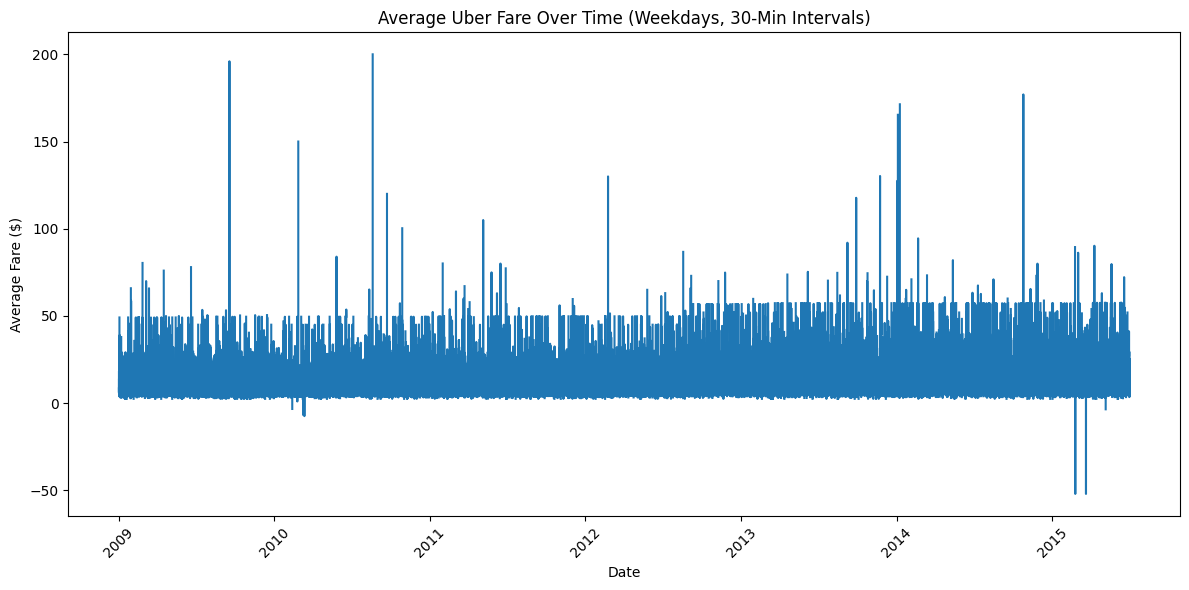

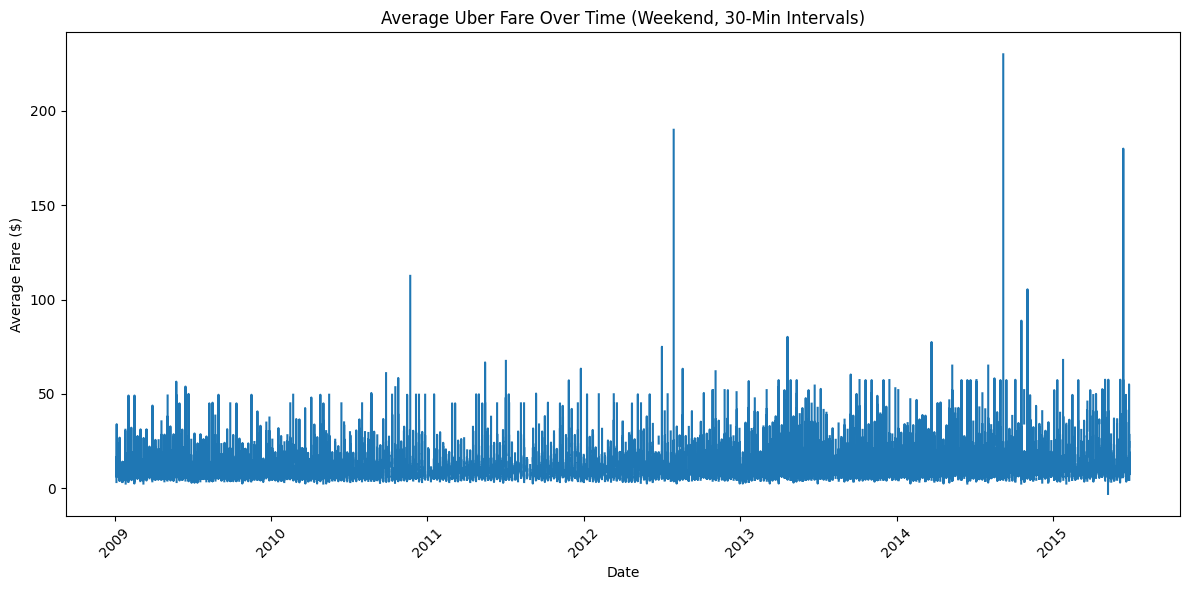

In [35]:
# Plot average uber fare on weekdays
import warnings
# Suppress FutureWarning from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data_weekday = data[data['pickup_datetime'].dt.dayofweek < 5]
data_agg = data_weekday.groupby(pd.Grouper(key='pickup_datetime', freq='30min'))['fare_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(data_agg['pickup_datetime'], data_agg['fare_amount'])
plt.title('Average Uber Fare Over Time (Weekdays, 30-Min Intervals)')
plt.xlabel('Date')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data_weekend = data[data['pickup_datetime'].dt.dayofweek > 5]

data_agg = data_weekend.groupby(pd.Grouper(key='pickup_datetime', freq='30min'))['fare_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(data_agg['pickup_datetime'], data_agg['fare_amount'])
plt.title('Average Uber Fare Over Time (Weekend, 30-Min Intervals)')
plt.xlabel('Date')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

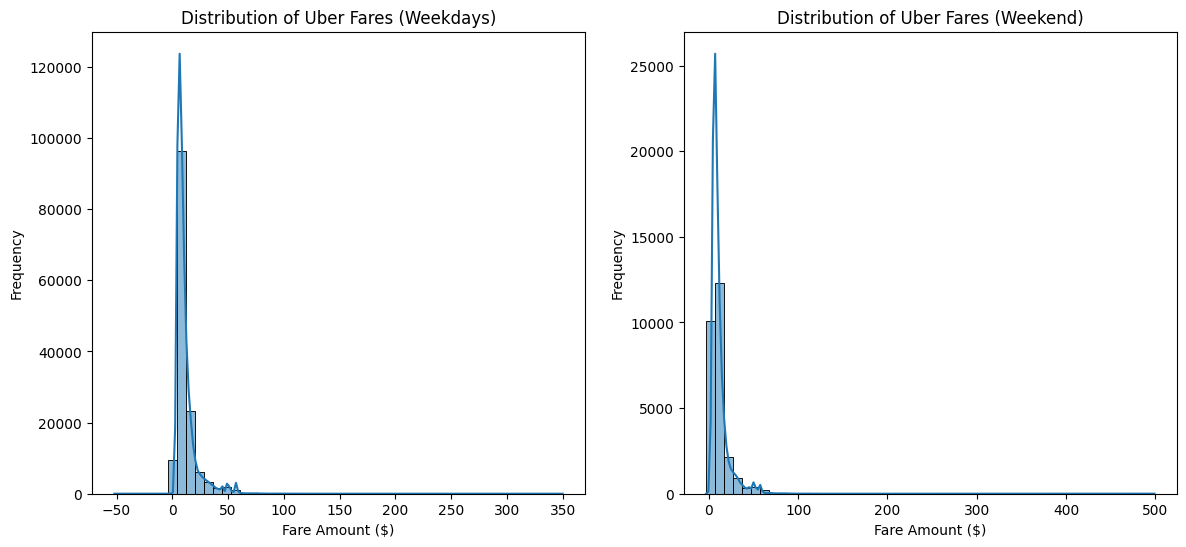

In [36]:
# Plot of distribution of uber fares on weekdays (Mon-Fri)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_weekday['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fares (Weekdays)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

# Plot of distribution of uber fares on weekends (Sat-Sun)
plt.subplot(1, 2, 2)
sns.histplot(data_weekend['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fares (Weekend)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

### III.iii. EDA summary and Modelling Stretegy ###

* **Data Source**: Kaggle
* **Data Collection** : Data collected from Uber public API
* **Data Size** :This dataset has 200,000 rows and 6 columns.
* **Attributes** : Attributes can be grouped into 4 categories:

   *  **Metadata** : key
   *  **Trip distance** : pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
   *  **Passenger information** : passenger_count
   *  **Fare information** : passenger count

* **Data Quality**:

   *  1 rows NaN in column: dropoff_longitude, dropoff_latitude
   *  No NaN in fare_amount, pickup_datetime, passenger_count
   *  About 2% of records has zero values in pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
   *  No Inf or -Inf values

* **Data Distribution**:

   *  There are fare spike over 200 dollars during rush hours
   *  There are few entries with negative fare amount or zero passengers.
   *  Average fares received for driving 30 mins: 0 - 50 dollars
   *  Fares earned during weekday is more consistent than weekends (less spike of fares received)
   *  Frequency: The majority of fares are low (e.g., ~120,000 rides below 10 dollars)
   *  Fare frequency dropping sharply as fares increase.
   *  Typical of transportation fare data where short, low-cost rides dominate.



## IV. Data Clearning and Pre-Processing ##

### IV.i. Data Clearning ###

* Data Cleaning needs:
   * Need to drop invalid distance records with Nan, and rows with zero values
   * Need to drop all invalid fare records with negative fares.
   * Need to remove outliner during surge hours (clip fare above 100 dollars)
   * Passenger count is irrelevant for the fare prediction, zero values will be replace with median.

In [37]:
# Cleaning invalid entries
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data['fare_amount'] = data['fare_amount'].clip(lower=2, upper=100)
data = data[(data['pickup_longitude'] != 0) & (data['pickup_latitude'] != 0)]
data = data[(data['dropoff_longitude'] != 0) & (data['dropoff_latitude'] != 0)]
data['passenger_count'] = data['passenger_count'].replace(0, data['passenger_count'].median())

# reduce dataset to weekday only.
data = data[data['pickup_datetime'].dt.dayofweek < 5]

print(f"Data cleaning complete.")

Data cleaning complete.


### IV.ii. Distance Pre-Processing ###

* Distance Pre-processing needs:
   * Need to calculate the distance traveled from the longtitude and latitude coordinates for fare predictions.
   * Standard method to calculate distance travelled between two coordinates is the haversine formula
   * Ref: [https://en.wikipedia.org/wiki/Haversine_formula](https://en.wikipedia.org/wiki/Haversine_formula)


In [38]:
# calculate distance in miles
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.square(np.sin(dlat / 2.0)) + \
        np.cos(lat1) * np.cos(lat2) * np.square(np.sin(dlon / 2.0))
    c = 2 * np.arcsin(np.sqrt(a))    
    r = 3958.8  # Radius of Earth in miles
    return c * r

# add new column distance
data['distance'] = haversine(
    data['pickup_latitude'], data['pickup_longitude'],
    data['dropoff_latitude'], data['dropoff_longitude']
)

print(f"Distance pre-processing complete.")

Distance pre-processing complete.


In [44]:
print(data.shape)
data.head(5)

(140449, 9)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.045980
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,1.527093
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,3.129495
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.032534
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2.780947


### IV.iii. Fare Pre-Processing and Modeling Strategy ###

* Data Pre-processing needs:
   * The presence of spikes, negative values indicates non-stationarity.
   * Since the fare data is skewed, log transformation is required before applying machine learning models.
   * After fare are log transformed, need to calculate the fare of previous day

* Pre-Processing strategy:
   * Since Weekends fare data exhibit greater variability, we should reduce the dataset to weekday only to have more consistent fare prediction.
   * Focusing on weekdays reduce skewness benefiting linear regression, but might not impact on Random Forest, or gradient bossting.
   * The decision of focusing on weekday fares reduce the data set by 15%
   * feature engineering is required to introduce 24 hours to capture temporal patterns

* Pre-Processing strategy:
Calculating a **lag column** in your Uber fare exercise allows you to capture **temporal dependencies** in the data—such as how current fare levels may be influenced by fares at the same time **24 hours earlier**. This is especially important for modeling patterns like **daily seasonality**, rush hours, or recurring demand cycles. Including lag features turns time-series data into a format usable by classical supervised learning models that assume independent rows, enabling them to learn from **past values as predictors** for current or future fares.

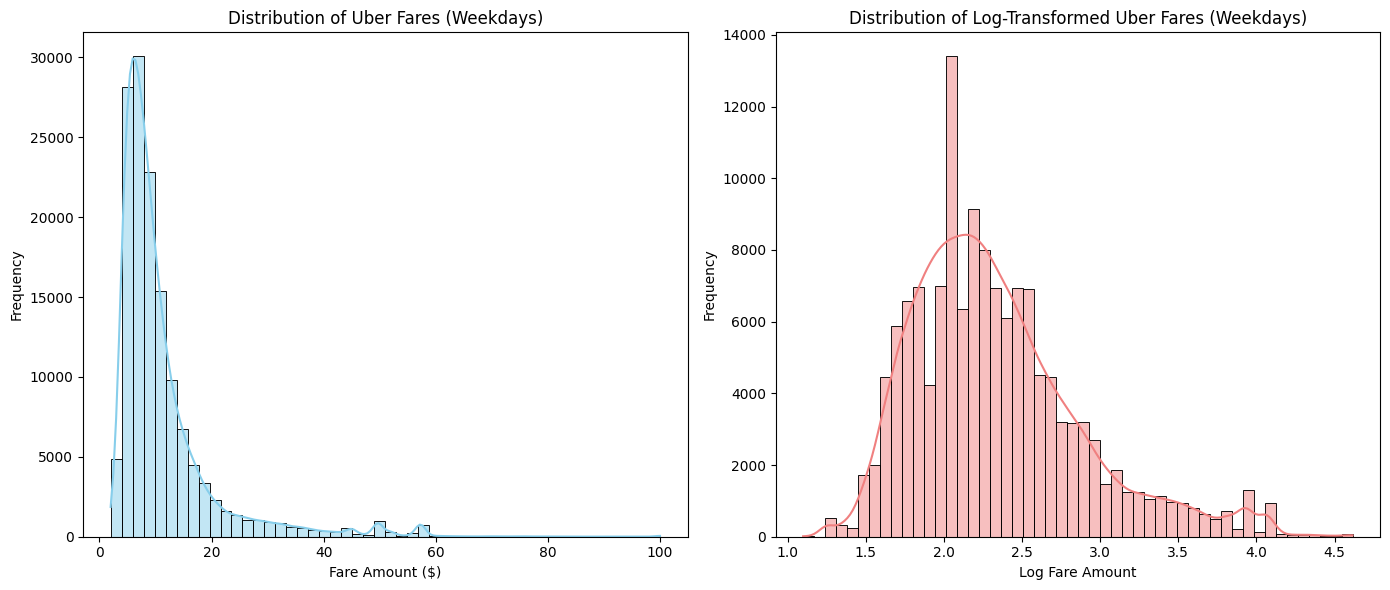

In [52]:
# Log transform fare_amount
if 'log_fare_amount' in data:
    data = data.drop('log_fare_amount', axis=1)
data['log_fare_amount'] = np.log1p(data['fare_amount'])

# plot log fare vs uber fares
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Uber Fares (Weekdays)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['log_fare_amount'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Log-Transformed Uber Fares (Weekdays)')
plt.xlabel('Log Fare Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [46]:
print(data.shape)
data.head(5)


(140449, 10)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,log_fare_amount
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.045980,2.014903
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,1.527093,2.041220
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,3.129495,2.557227
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.032534,1.667707
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2.780947,2.772589


In [56]:
# create fare column to calculate fares from 24 hours ago, within the windows of 30 mins.
if 'lagged_log_fare' in data:
    data = data.drop('lagged_log_fare', axis=1)
global_mean = data['log_fare_amount'].mean()

# Calculate lagged log fare 
def get_lagged_log_fare(df, current_time, lag_hours=24, window_minutes=30, fallback=np.nan):
    lagged_time = current_time - pd.Timedelta(hours=lag_hours)
    window_start = lagged_time - pd.Timedelta(minutes=window_minutes / 2)
    window_end = lagged_time + pd.Timedelta(minutes=window_minutes / 2)
    window_rides = df[(df['pickup_datetime'] >= window_start) &
                      (df['pickup_datetime'] <= window_end)]
    if not window_rides.empty:
        return window_rides['log_fare_amount'].mean()
    return fallback

lag_values = np.empty(len(data), dtype=float)
lag_values[:] = np.nan

for idx, current_time in enumerate(data['pickup_datetime']):
    lagged_hours = 72 if current_time.dayofweek == 0 else 24  # Monday uses Friday
    lag_values[idx] = get_lagged_log_fare(data, current_time, lag_hours=lagged_hours, fallback=np.nan)
data['lagged_log_fare'] = lag_values

# Fill missing value with hourly means
data['hour'] = data['pickup_datetime'].dt.hour
hourly_means = data.groupby('hour')['lagged_log_fare'].mean()
hourly_means = hourly_means.fillna(global_mean) 
data['lagged_log_fare'] = data.apply(
    lambda row: hourly_means[row['hour']] if pd.isna(row['lagged_log_fare']) else row['lagged_log_fare'],
    axis=1
)

data['lagged_log_fare'] = data['lagged_log_fare'].fillna(global_mean)
data['lagged_log_fare'] = data['lagged_log_fare'].replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['log_fare_amount', 'lagged_log_fare', 'hour'])
data = data[data['lagged_log_fare'] > 0]
print("lagged_log_fare preprocessing complete.")

lagged_log_fare preprocessing complete.
(140449, 12)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,log_fare_amount,hour,lagged_log_fare
100844,2009-01-01 01:15:22.0000006,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,1.394848,2.251292,1,2.345361
43961,2009-01-01 01:59:17.0000001,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,2.433840,2.639057,1,2.345361
7628,2009-01-01 02:05:03.0000003,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,2.352995,2.451005,2,2.343900
118760,2009-01-01 02:09:13.0000003,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,3.695309,2.580217,2,2.343900
89763,2009-01-01 02:13:41.0000001,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,1.729931,2.484907,2,2.343900


### IV. Feature Engineering ###

* Data Pre-processing needs:
   * The presence of spikes, negative values indicates non-stationarity.
   * Since the fare data is skewed, log transformation is required before applying machine learning models.
   * fares amount should be log transformed before modeling.
* Pre-Processing strategy:
   * Since Weekends fare data exhibit greater variability, we should reduce the dataset to weekday only to have more consistent fare prediction.
   * Focusing on weekdays reduce skewness benefiting linear regression, but might not impact on Random Forest, or gradient bossting.
   * The decision of focusing on weekday fares reduce the data set by 15%
   * feature engineering is required to introduce 24 hours to capture temporal patterns (Details explanation below)

Smearing Factor: 1.0328378947170342
MAE: 2.0240175000141263
RMSE: 4.52422665654533
R2 Score: 0.7149994692349642


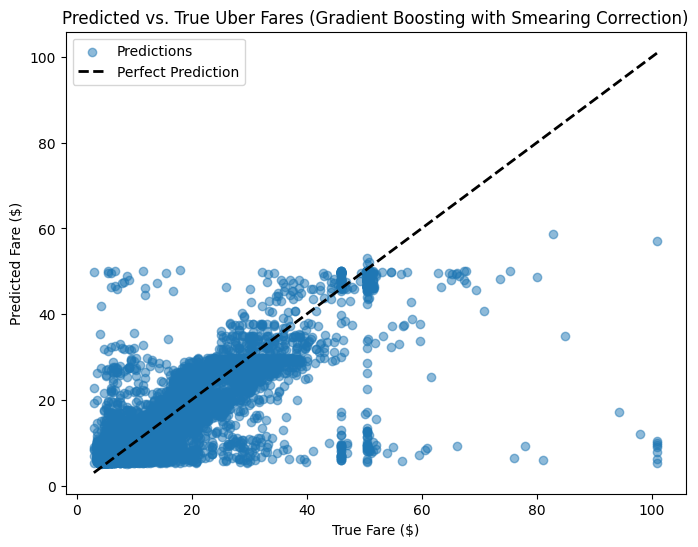

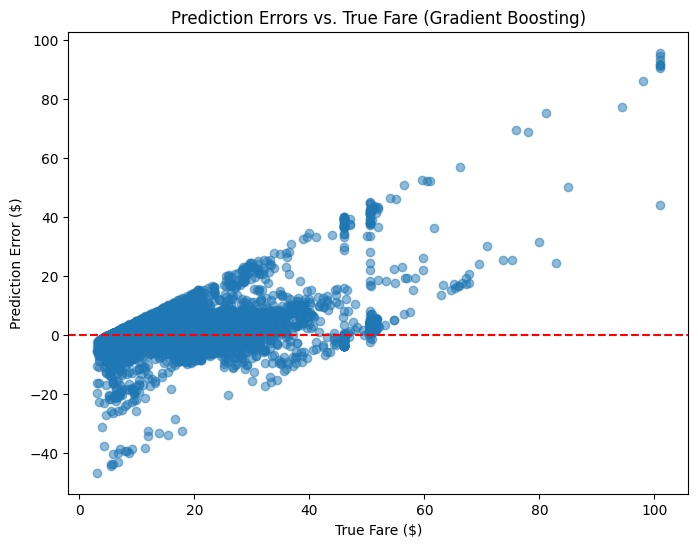

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Add additional features
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['is_rush_hour'] = data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# Define features and target
X = data[['hour', 'distance', 'lagged_log_fare', 'day_of_week', 'is_rush_hour']]
y = data['log_fare_amount']

# Ensure no NaN values
X = X.dropna()
y = y.loc[X.index]

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Apply smearing correction
y_train_pred = model.predict(X_train)
residuals_log = y_train - y_train_pred
smearing_factor = np.mean(np.exp(residuals_log))
print("Smearing Factor:", smearing_factor)

# Predict and apply smearing correction
y_test_pred_log = model.predict(X_test)
y_test_pred = np.exp(y_test_pred_log) * smearing_factor
y_test_true = np.exp(y_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test_true, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_true, y_test_pred)))
print("R2 Score:", model.score(X_test, y_test))

# Visualize predicted vs. true fares
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, y_test_pred, alpha=0.5, label='Predictions')
plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('True Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title('Predicted vs. True Uber Fares (Gradient Boosting with Smearing Correction)')
plt.legend()
plt.show()

# Visualize prediction errors
errors = y_test_true - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, errors, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('True Fare ($)')
plt.ylabel('Prediction Error ($)')
plt.title('Prediction Errors vs. True Fare (Gradient Boosting)')
plt.show()


Training Linear Regression...
Smearing Factor (Linear Regression): 1.170113568469372
MAE (Linear Regression): 4.981247706815232
RMSE (Linear Regression): 8.190390418433285
R2 Score (Linear Regression): 0.0024793144088809393

Training Random Forest...
Smearing Factor (Random Forest): 1.0033564500092809
MAE (Random Forest): 2.1135389793416723
RMSE (Random Forest): 4.632440350154847
R2 Score (Random Forest): 0.6905191123558057

Training AdaBoost...
Smearing Factor (AdaBoost): 0.9927580249191426
MAE (AdaBoost): 2.618512849778162
RMSE (AdaBoost): 5.506615725134394
R2 Score (AdaBoost): 0.6397727415831052

Training Gradient Boosting...
Smearing Factor (Gradient Boosting): 1.0328378947170342
MAE (Gradient Boosting): 2.0240175000141263
RMSE (Gradient Boosting): 4.52422665654533
R2 Score (Gradient Boosting): 0.7149994692349642


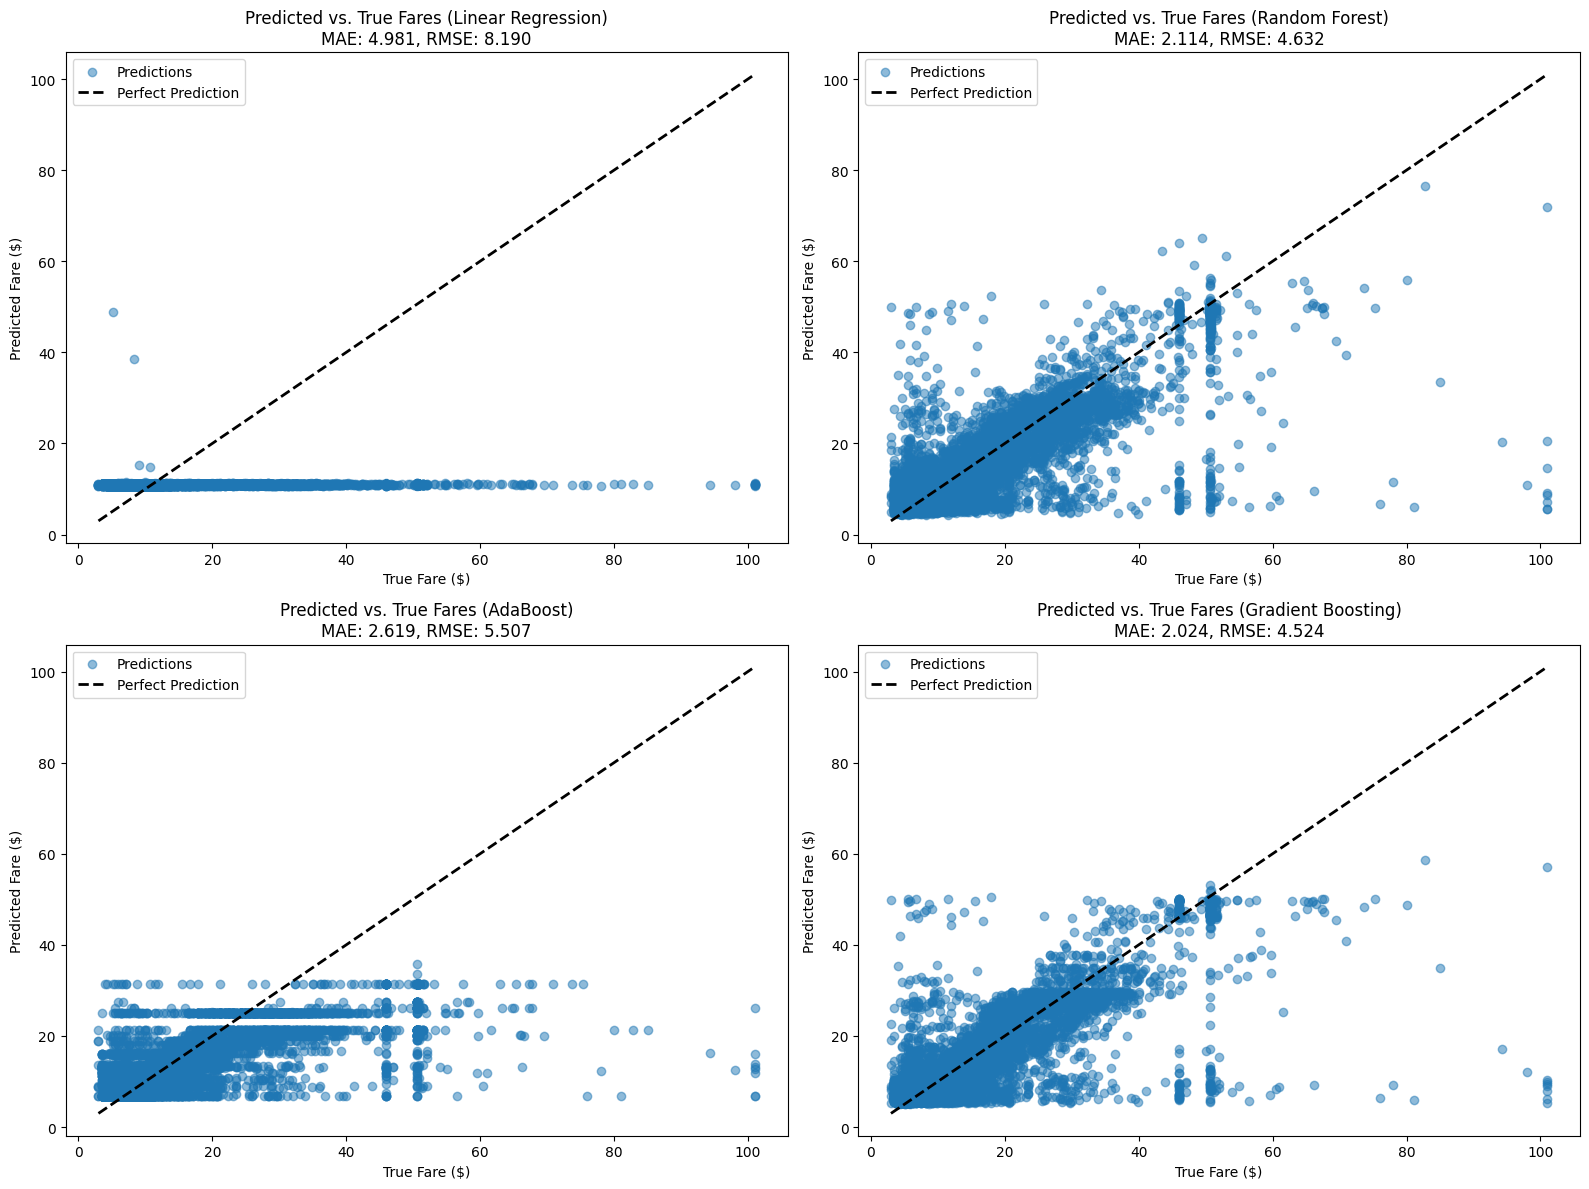

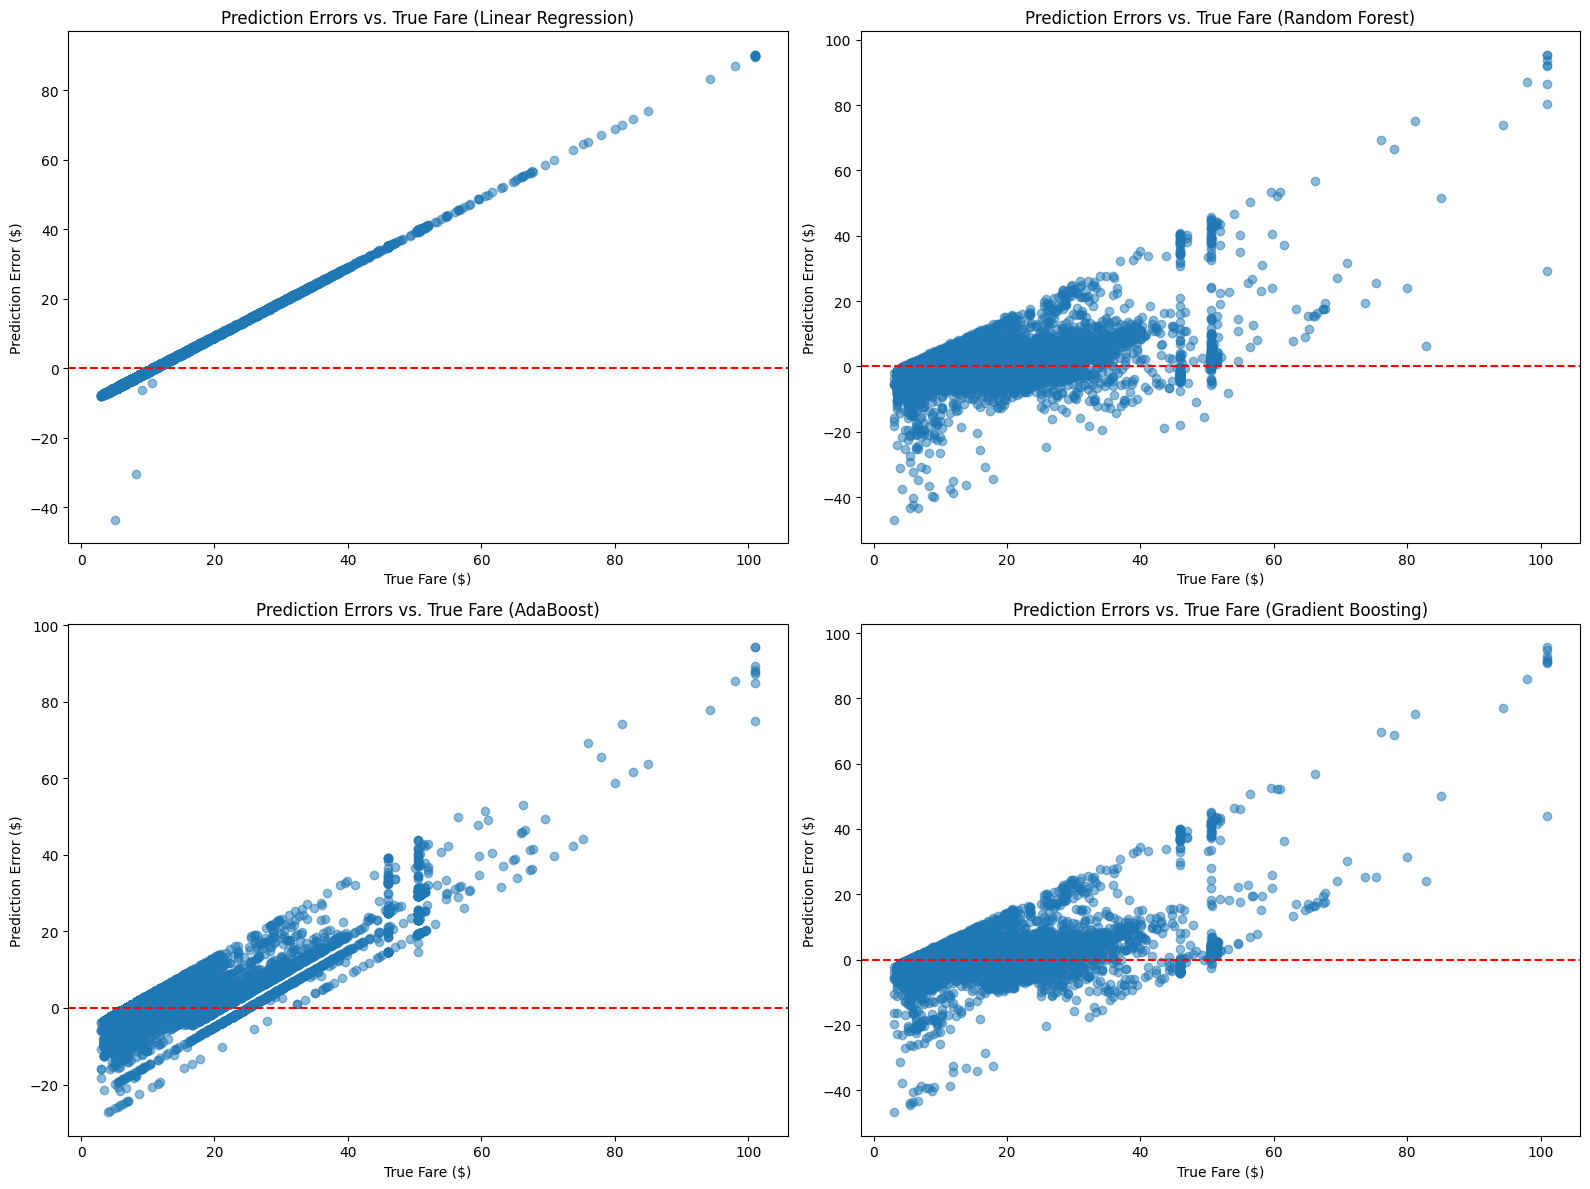

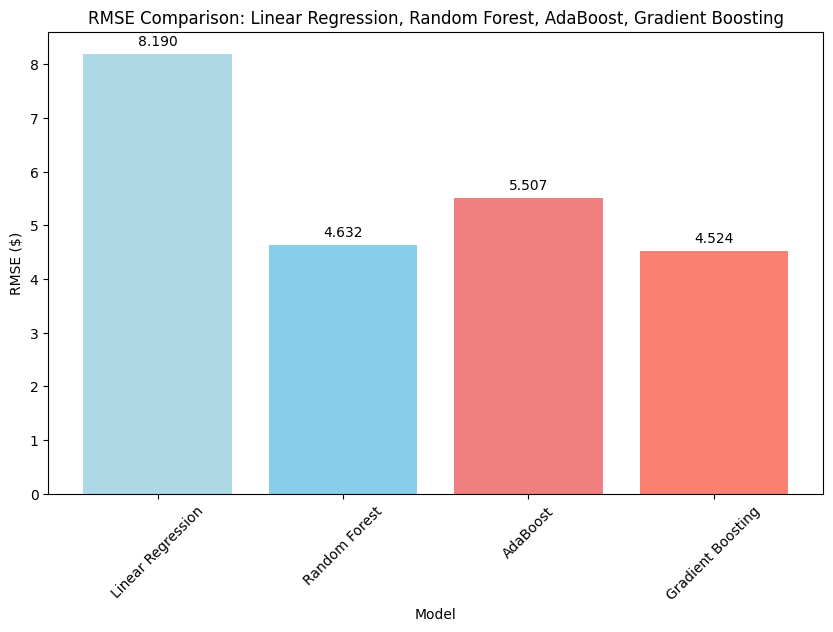

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming data is the Uber fare dataset after preprocessing
# Add additional features
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['is_rush_hour'] = data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# Define features and target
X = data[['hour', 'distance', 'lagged_log_fare', 'day_of_week', 'is_rush_hour']]
y = data['log_fare_amount']

# Ensure no NaN values
X = X.dropna()
y = y.loc[X.index]

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Use the last split for a single train-test set

# Initialize models (added Linear Regression)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results, including RMSE for comparison
results = {}
rmse_values = {}  # To store RMSE for each model

# Train, predict, and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Apply smearing correction
    y_train_pred = model.predict(X_train)
    residuals_log = y_train - y_train_pred
    smearing_factor = np.mean(np.exp(residuals_log))
    print(f"Smearing Factor ({model_name}):", smearing_factor)
    
    # Predict on test set and apply smearing correction
    y_test_pred_log = model.predict(X_test)
    y_test_pred = np.exp(y_test_pred_log) * smearing_factor
    y_test_true = np.exp(y_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test_true, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2 = model.score(X_test, y_test)  # R2 on log-scale
    
    print(f"MAE ({model_name}):", mae)
    print(f"RMSE ({model_name}):", rmse)
    print(f"R2 Score ({model_name}):", r2)
    
    # Store results and RMSE
    results[model_name] = {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    rmse_values[model_name] = rmse

# Plotting
# Predicted vs. True Fares (2x2 grid for 4 models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to iterate easily

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.scatter(result['y_test_true'], result['y_test_pred'], alpha=0.5, label='Predictions')
    ax.plot([result['y_test_true'].min(), result['y_test_true'].max()], 
            [result['y_test_true'].min(), result['y_test_true'].max()], 
            'k--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Predicted Fare ($)')
    ax.set_title(f'Predicted vs. True Fares ({model_name})\nMAE: {result["mae"]:.3f}, RMSE: {result["rmse"]:.3f}')
    ax.legend()

plt.tight_layout()
plt.show()

# Prediction Errors (2x2 grid for 4 models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    errors = result['y_test_true'] - result['y_test_pred']
    ax.scatter(result['y_test_true'], errors, alpha=0.5)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Prediction Error ($)')
    ax.set_title(f'Prediction Errors vs. True Fare ({model_name})')

plt.tight_layout()
plt.show()

# Compare RMSE with a bar plot
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'skyblue', 'lightcoral', 'salmon']
plt.bar(rmse_values.keys(), rmse_values.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('RMSE ($)')
plt.title('RMSE Comparison: Linear Regression, Random Forest, AdaBoost, Gradient Boosting')
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()


Training Linear Regression...
Smearing Factor (Linear Regression): 1.1701680376357897
MAE (Linear Regression): 4.982304165786216
RMSE (Linear Regression): 8.191301287925258
R2 Score (Linear Regression): 0.002093070977356004

Training Random Forest...
Smearing Factor (Random Forest): 1.0032669091330917
MAE (Random Forest): 2.1127504202882816
RMSE (Random Forest): 4.626833236343279
R2 Score (Random Forest): 0.6906583057695279

Training AdaBoost...
Smearing Factor (AdaBoost): 0.9906154668797282
MAE (AdaBoost): 2.578945823903769
RMSE (AdaBoost): 5.343122317689643
R2 Score (AdaBoost): 0.6418889409351781

Training Gradient Boosting...
Smearing Factor (Gradient Boosting): 1.032838097006952
MAE (Gradient Boosting): 2.024238296345231
RMSE (Gradient Boosting): 4.524585603529223
R2 Score (Gradient Boosting): 0.7149902387337963


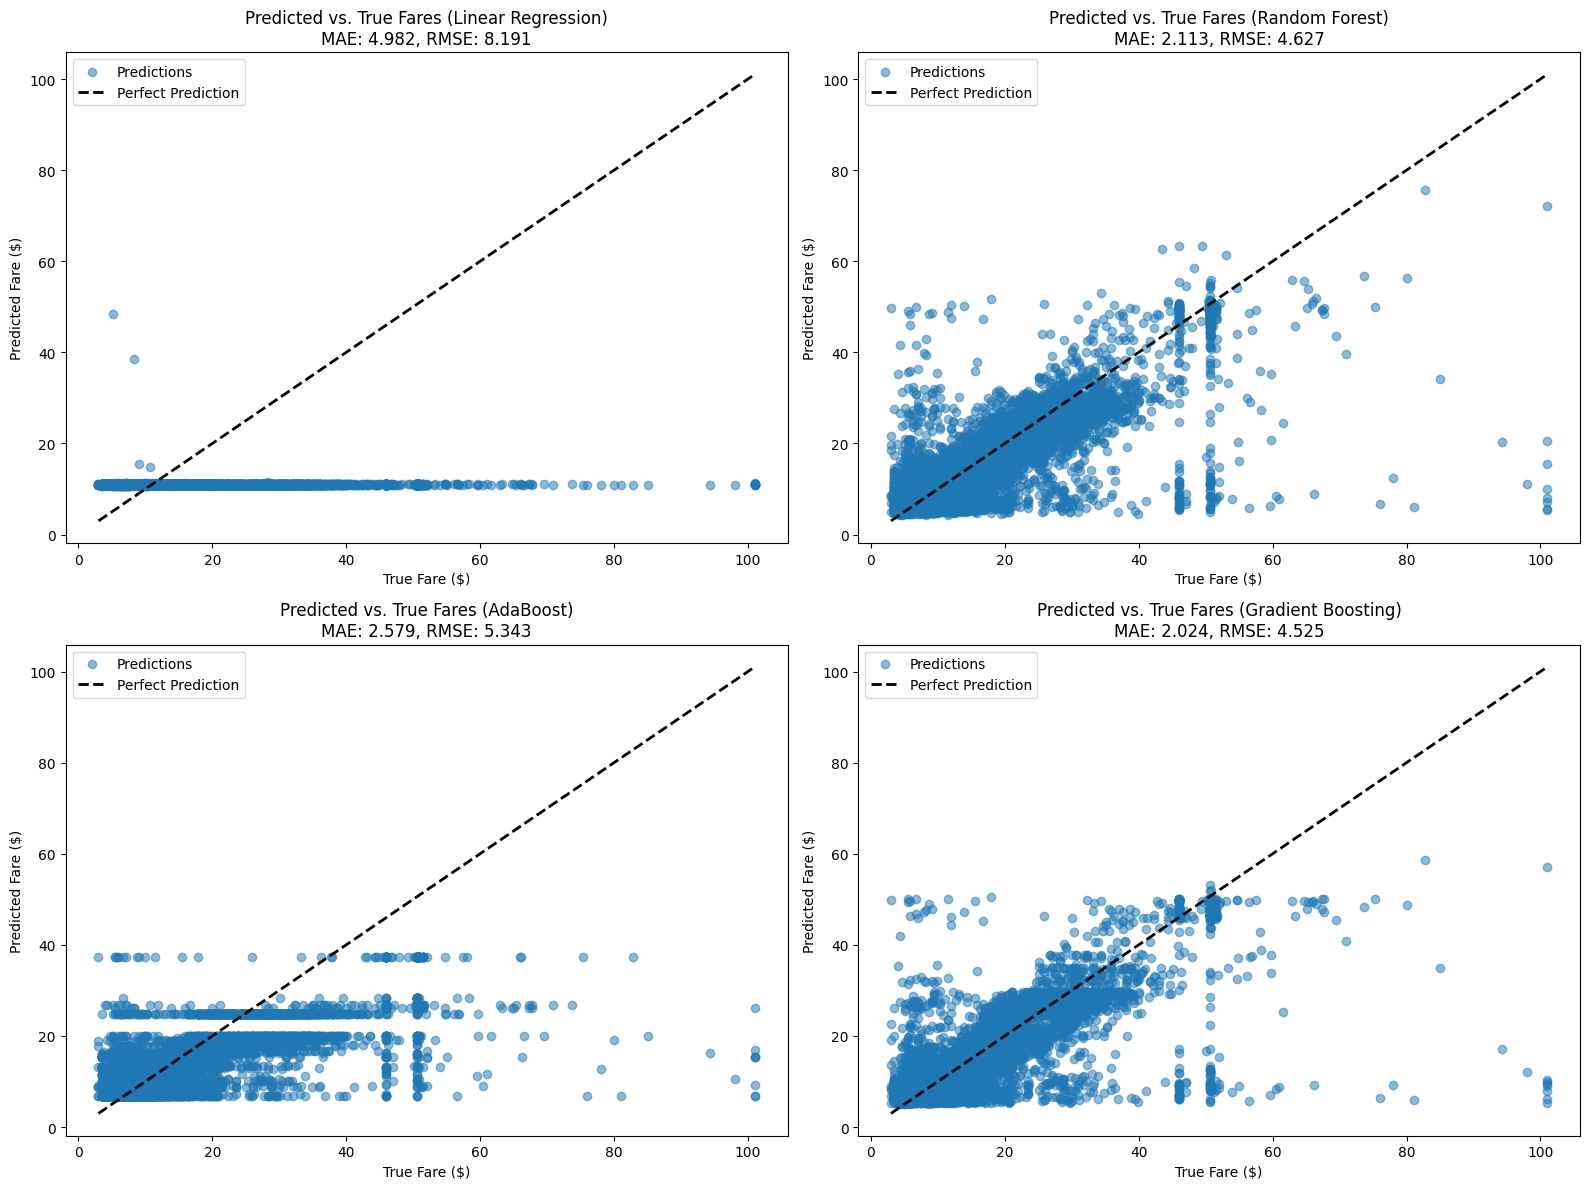

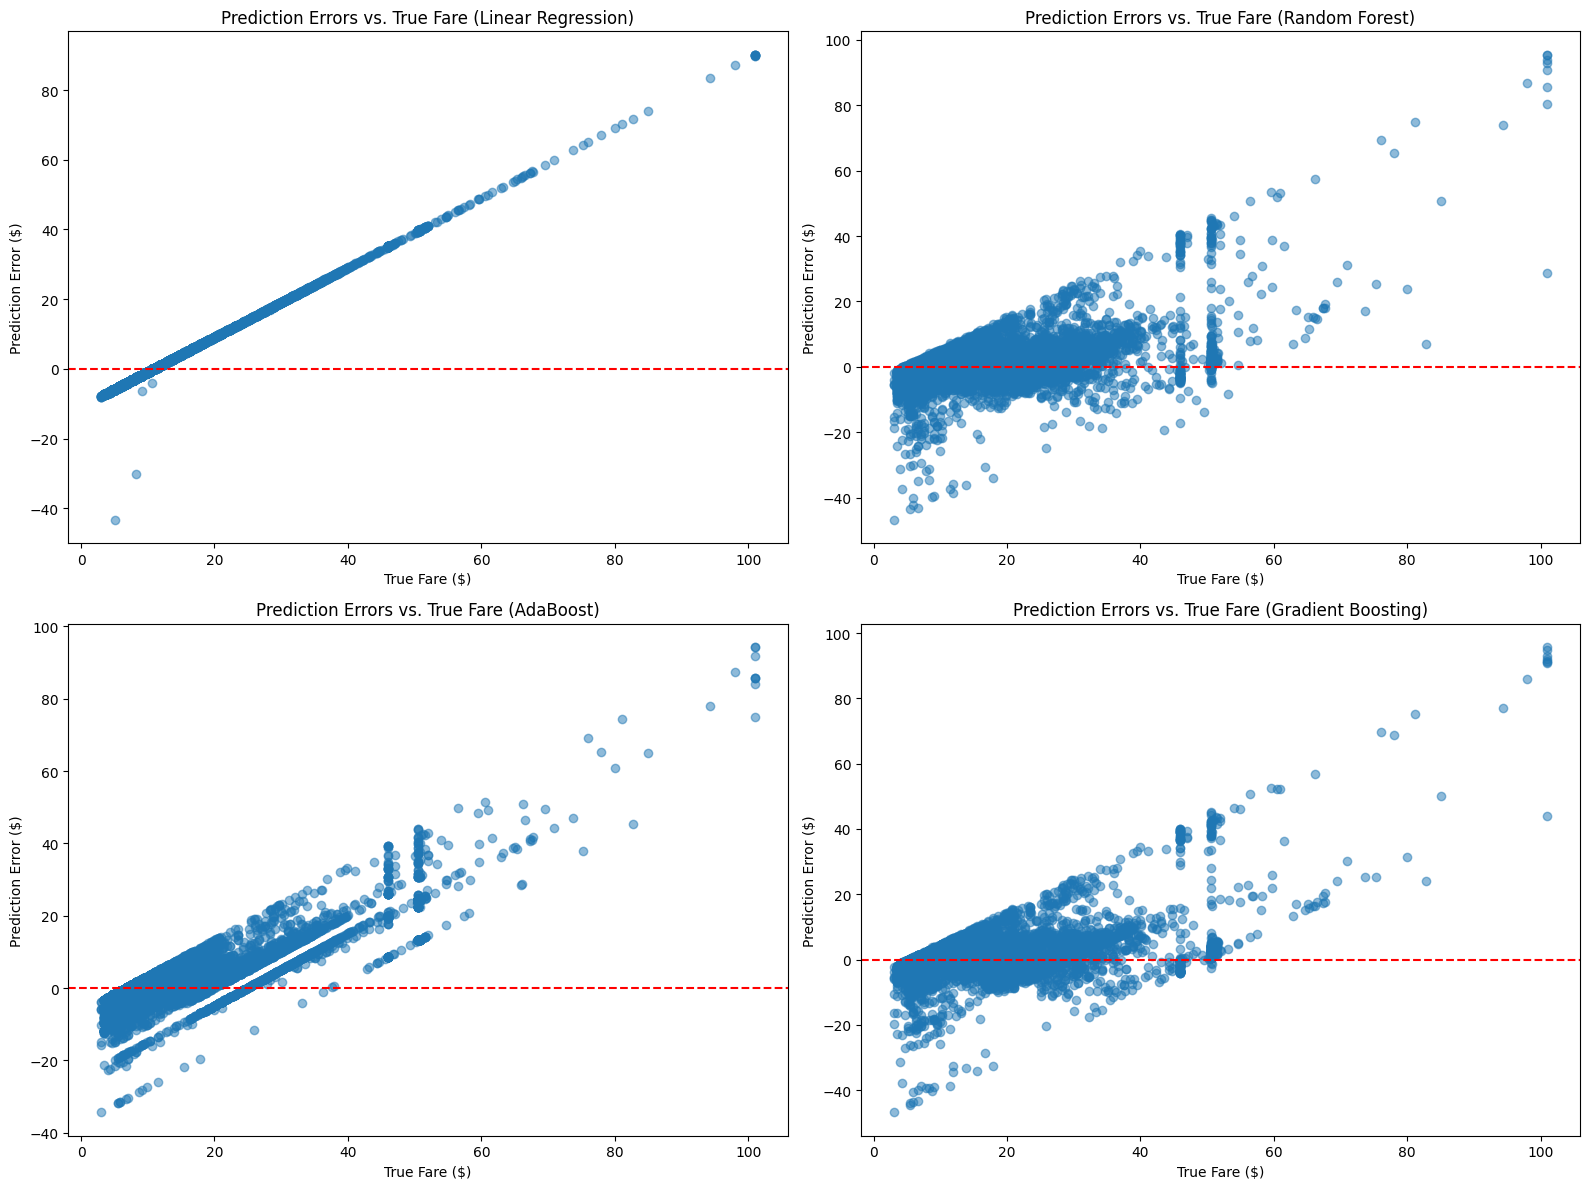

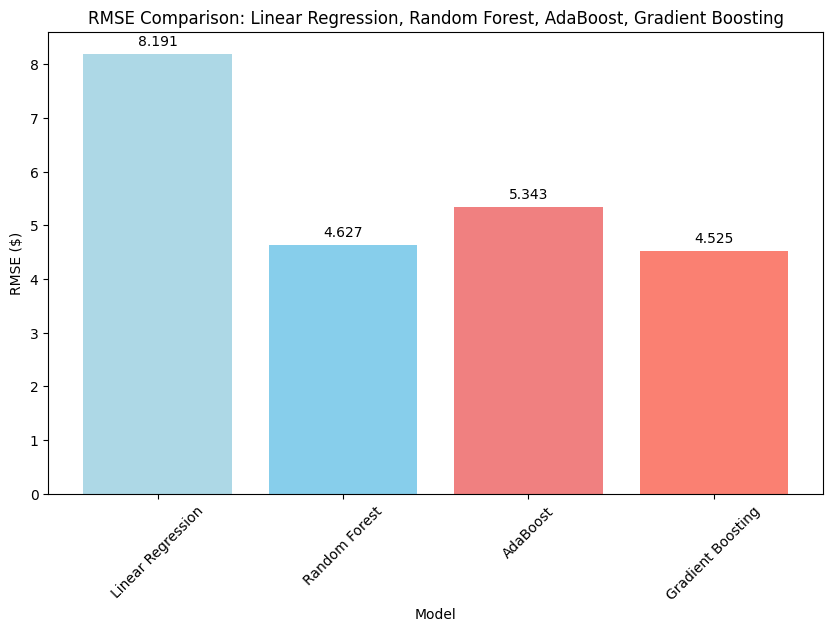

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming data is the Uber fare dataset after preprocessing
# Add additional features
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
# data['is_rush_hour'] = data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# Define features and target
X = data[['hour', 'distance', 'lagged_log_fare', 'day_of_week']]
y = data['log_fare_amount']

# Ensure no NaN values
X = X.dropna()
y = y.loc[X.index]

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Use the last split for a single train-test set

# Initialize models (added Linear Regression)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results, including RMSE for comparison
results = {}
rmse_values = {}  # To store RMSE for each model

# Train, predict, and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Apply smearing correction
    y_train_pred = model.predict(X_train)
    residuals_log = y_train - y_train_pred
    smearing_factor = np.mean(np.exp(residuals_log))
    print(f"Smearing Factor ({model_name}):", smearing_factor)
    
    # Predict on test set and apply smearing correction
    y_test_pred_log = model.predict(X_test)
    y_test_pred = np.exp(y_test_pred_log) * smearing_factor
    y_test_true = np.exp(y_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test_true, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2 = model.score(X_test, y_test)  # R2 on log-scale
    
    print(f"MAE ({model_name}):", mae)
    print(f"RMSE ({model_name}):", rmse)
    print(f"R2 Score ({model_name}):", r2)
    
    # Store results and RMSE
    results[model_name] = {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    rmse_values[model_name] = rmse

# Plotting
# Predicted vs. True Fares (2x2 grid for 4 models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to iterate easily

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.scatter(result['y_test_true'], result['y_test_pred'], alpha=0.5, label='Predictions')
    ax.plot([result['y_test_true'].min(), result['y_test_true'].max()], 
            [result['y_test_true'].min(), result['y_test_true'].max()], 
            'k--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Predicted Fare ($)')
    ax.set_title(f'Predicted vs. True Fares ({model_name})\nMAE: {result["mae"]:.3f}, RMSE: {result["rmse"]:.3f}')
    ax.legend()

plt.tight_layout()
plt.show()

# Prediction Errors (2x2 grid for 4 models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    errors = result['y_test_true'] - result['y_test_pred']
    ax.scatter(result['y_test_true'], errors, alpha=0.5)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Prediction Error ($)')
    ax.set_title(f'Prediction Errors vs. True Fare ({model_name})')

plt.tight_layout()
plt.show()

# Compare RMSE with a bar plot
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'skyblue', 'lightcoral', 'salmon']
plt.bar(rmse_values.keys(), rmse_values.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('RMSE ($)')
plt.title('RMSE Comparison: Linear Regression, Random Forest, AdaBoost, Gradient Boosting')
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()


Training Random Forest...
Smearing Factor (Random Forest): 1.0033564500092809
MAE (Random Forest): 2.1135389793416723
RMSE (Random Forest): 4.632440350154847
R2 Score (Random Forest): 0.6905191123558057

Training AdaBoost...
Smearing Factor (AdaBoost): 0.9927580249191426
MAE (AdaBoost): 2.618512849778162
RMSE (AdaBoost): 5.506615725134394
R2 Score (AdaBoost): 0.6397727415831052

Training GradientBoost...
Smearing Factor (GradientBoost): 1.0328378947170342
MAE (GradientBoost): 2.0240175000141263
RMSE (GradientBoost): 4.52422665654533
R2 Score (GradientBoost): 0.7149994692349642


IndexError: index 2 is out of bounds for axis 0 with size 2

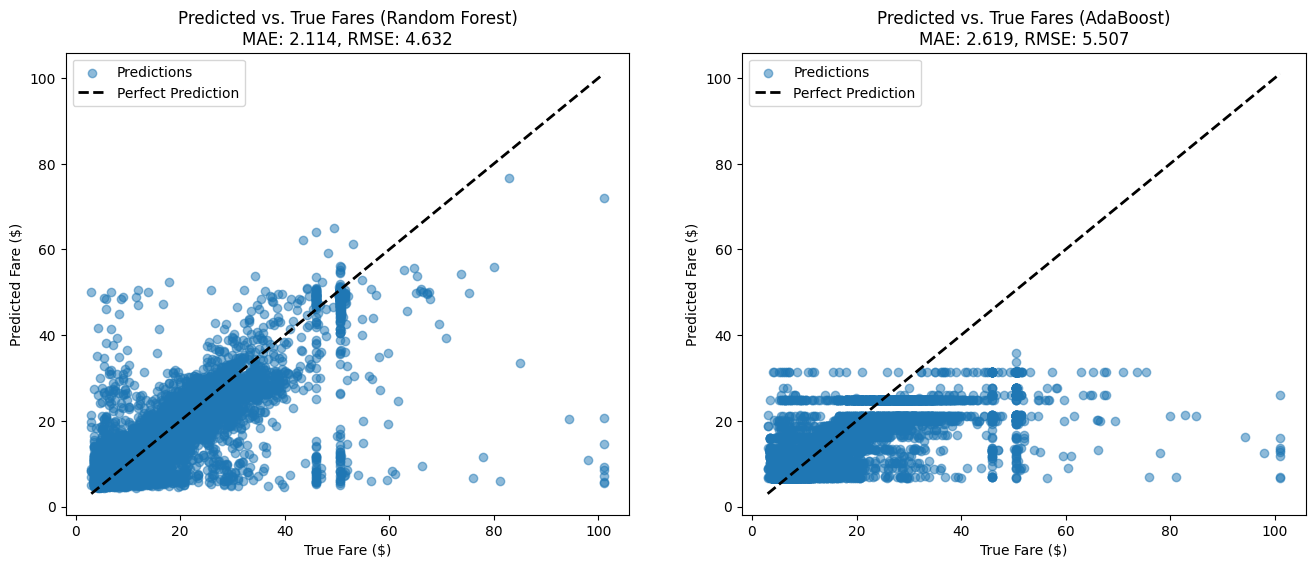

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming data is the Uber fare dataset after preprocessing
# Add additional features
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['is_rush_hour'] = data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# Define features and target
X = data[['hour', 'distance', 'lagged_log_fare', 'day_of_week', 'is_rush_hour']]
y = data['log_fare_amount']

# Ensure no NaN values
X = X.dropna()
y = y.loc[X.index]

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Use the last split for a single train-test set

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'GradientBoost': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results, including RMSE for comparison
results = {}
rmse_values = {}  # To store RMSE for each model

# Train, predict, and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Apply smearing correction
    y_train_pred = model.predict(X_train)
    residuals_log = y_train - y_train_pred
    smearing_factor = np.mean(np.exp(residuals_log))
    print(f"Smearing Factor ({model_name}):", smearing_factor)
    
    # Predict on test set and apply smearing correction
    y_test_pred_log = model.predict(X_test)
    y_test_pred = np.exp(y_test_pred_log) * smearing_factor
    y_test_true = np.exp(y_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test_true, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2 = model.score(X_test, y_test)  # R2 on log-scale
    
    print(f"MAE ({model_name}):", mae)
    print(f"RMSE ({model_name}):", rmse)
    print(f"R2 Score ({model_name}):", r2)
    
    # Store results and RMSE
    results[model_name] = {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    rmse_values[model_name] = rmse

# Plotting
# Predicted vs. True Fares
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.scatter(result['y_test_true'], result['y_test_pred'], alpha=0.5, label='Predictions')
    ax.plot([result['y_test_true'].min(), result['y_test_true'].max()], 
            [result['y_test_true'].min(), result['y_test_true'].max()], 
            'k--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Predicted Fare ($)')
    ax.set_title(f'Predicted vs. True Fares ({model_name})\nMAE: {result["mae"]:.3f}, RMSE: {result["rmse"]:.3f}')
    ax.legend()
plt.tight_layout()
plt.show()

# Prediction Errors
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    errors = result['y_test_true'] - result['y_test_pred']
    ax.scatter(result['y_test_true'], errors, alpha=0.5)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Prediction Error ($)')
    ax.set_title(f'Prediction Errors vs. True Fare ({model_name})')
plt.tight_layout()
plt.show()

# Compare RMSE with a bar plot
plt.figure(figsize=(8, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['skyblue', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('RMSE ($)')
plt.title('RMSE Comparison: Random Forest vs. AdaBoost')
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom')
plt.show()

In [ ]:
# Initialize models (added Linear Regression)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Plotting adjustments for four models (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# RMSE bar plot
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'skyblue', 'lightcoral', 'salmon']
plt.bar(rmse_values.keys(), rmse_values.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('RMSE ($)')
plt.title('RMSE Comparison: Linear Regression, Random Forest, AdaBoost, Gradient Boosting')
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

Smearing Factor: 1.1963308453554307
MAE: 5.962062691901128
RMSE: 9.565007909441523


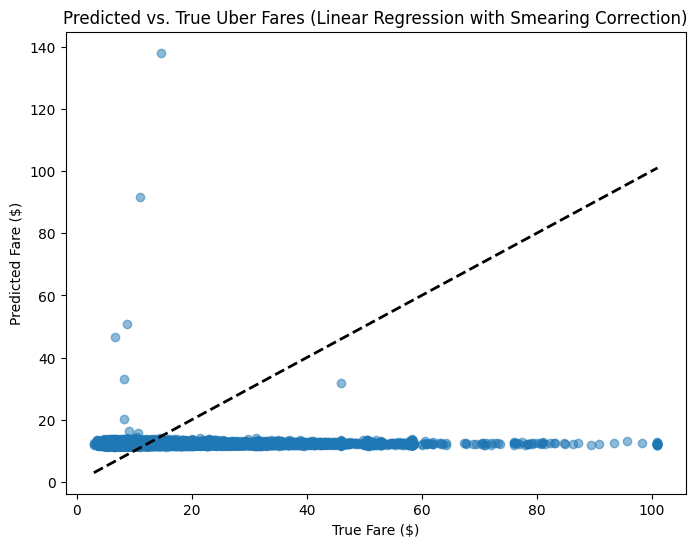

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = data[['hour', 'distance', 'lagged_log_fare']]
y = data['log_fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Apply smearing correction
y_train_pred = model.predict(X_train)
residuals_log = y_train - y_train_pred
smearing_factor = np.mean(np.exp(residuals_log))
print("Smearing Factor:", smearing_factor)

# Predict on test set and apply smearing correction
y_test_pred_log = model.predict(X_test)
y_test_pred = np.exp(y_test_pred_log) * smearing_factor
y_test_true = np.exp(y_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test_true, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_true, y_test_pred)))

# Visualize predicted vs. true fares
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, y_test_pred, alpha=0.5)
plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'k--', lw=2)
plt.xlabel('True Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title('Predicted vs. True Uber Fares (Linear Regression with Smearing Correction)')
plt.show()

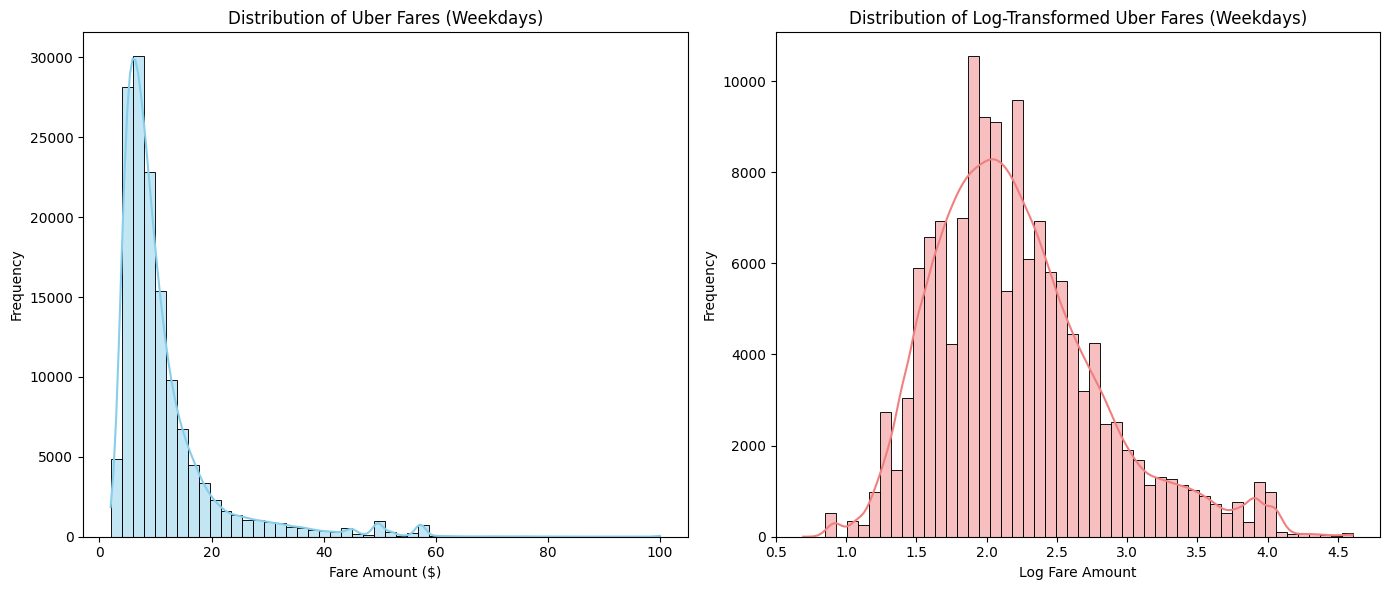

In [41]:
print("project complete.")


Mention something about nature of data is time-series
